In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

ufc_df = pd.read_csv('ufc.csv')
ufc_df.head(4)



,Location,Fighter 1,Fighter 2,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,Weight_Class,Method,Round,Time,Event Name,Date,Winner
0,"Austin, Texas, USA",Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punch,1.0,1:04,UFC Fight Night,2-Dec-23,Arman Tsarukyan
1,"Austin, Texas, USA",Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punches,1.0,2:49,UFC Fight Night,2-Dec-23,Jalin Turner
2,"Austin, Texas, USA",Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,0.0,0.0,Bantamweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Deiveson Figueiredo
3,"Austin, Texas, USA",Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,3.0,0.0,Welterweight,SUB Kimura,3.0,1:43,UFC Fight Night,2-Dec-23,Sean Brady


In [ ]:
ufc_df.isnull().sum()

Location         0
Fighter 1        0
Fighter 2        4
Fighter_1_KD     4
Fighter_2_KD     4
Fighter_1_STR    4
Fighter_2_STR    4
Fighter_1_TD     4
Fighter_2_TD     4
Fighter_1_SUB    4
Fighter_2_SUB    4
Weight_Class     4
Method           4
Round            4
Time             4
Event Name       4
Date             5
Winner           3
dtype: int64

In [ ]:
ufc_df[ufc_df.isnull().any(axis=1)]

,Location,Fighter 1,Fighter 2,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,Weight_Class,Method,Round,Time,Event Name,Date,Winner
6405,"Fayetteville, North Carolina, USA",Mike Swick,Jonathan Goulet,1.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,Welterweight,KO/TKO Punch,1.0,0:33,UFC Fight Night - Fight for the Troops,NaN,Mike Swick
7413,"Denver, Colorado, USA",Frank Hamaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scott Morris
7414,"Denver, Colorado, USA",Johnny Rhodes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7415,"Denver, Colorado, USA",Patrick Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7416,"Denver, Colorado, USA",Scott Morris,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ufc_df.dropna(inplace=True)

In [ ]:
ufc_df.duplicated().sum()

0

In [ ]:
ufc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7412 entries, 0 to 7412
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       7412 non-null   object 
 1   Fighter 1      7412 non-null   object 
 2   Fighter 2      7412 non-null   object 
 3   Fighter_1_KD   7412 non-null   float64
 4   Fighter_2_KD   7412 non-null   float64
 5   Fighter_1_STR  7412 non-null   float64
 6   Fighter_2_STR  7412 non-null   float64
 7   Fighter_1_TD   7412 non-null   float64
 8   Fighter_2_TD   7412 non-null   float64
 9   Fighter_1_SUB  7412 non-null   float64
 10  Fighter_2_SUB  7412 non-null   float64
 11  Weight_Class   7412 non-null   object 
 12  Method         7412 non-null   object 
 13  Round          7412 non-null   float64
 14  Time           7412 non-null   object 
 15  Event Name     7412 non-null   object 
 16  Date           7412 non-null   object 
 17  Winner         7412 non-null   object 
dtypes: float64(9)

In [ ]:
numeric_columns = [
    'Fighter_1_KD', 'Fighter_2_KD',
    'Fighter_1_STR', 'Fighter_2_STR',
    'Fighter_1_TD', 'Fighter_2_TD',
    'Fighter_1_SUB', 'Fighter_2_SUB'
]

ufc_df[numeric_columns] = ufc_df[numeric_columns].apply(pd.to_numeric)

In [ ]:
ufc_df['Time'] = pd.to_datetime(ufc_df['Time'], format='%M:%S').dt.time
ufc_df['Date'] = pd.to_datetime(ufc_df['Date'], format='%d-%b-%y').dt.date

In [ ]:
#done with cleaning

In [ ]:
ufc_df.shape

(7412, 18)

In [ ]:
ufc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7412 entries, 0 to 7412
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       7412 non-null   object 
 1   Fighter 1      7412 non-null   object 
 2   Fighter 2      7412 non-null   object 
 3   Fighter_1_KD   7412 non-null   float64
 4   Fighter_2_KD   7412 non-null   float64
 5   Fighter_1_STR  7412 non-null   float64
 6   Fighter_2_STR  7412 non-null   float64
 7   Fighter_1_TD   7412 non-null   float64
 8   Fighter_2_TD   7412 non-null   float64
 9   Fighter_1_SUB  7412 non-null   float64
 10  Fighter_2_SUB  7412 non-null   float64
 11  Weight_Class   7412 non-null   object 
 12  Method         7412 non-null   object 
 13  Round          7412 non-null   float64
 14  Time           7412 non-null   object 
 15  Event Name     7412 non-null   object 
 16  Date           7412 non-null   object 
 17  Winner         7412 non-null   object 
dtypes: float64(9)

In [ ]:
ufc_df.describe()

,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,Round
count,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000
mean,0.366972,0.063546,43.123314,28.561657,1.452105,0.666352,0.532110,0.250540,2.338505
std,0.607362,0.268197,34.396949,26.934822,1.981019,1.186660,0.939354,0.689156,1.013716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,36.000000,22.000000,1.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,0.000000,61.000000,41.000000,2.000000,1.000000,1.000000,0.000000,3.000000
max,5.000000,3.000000,445.000000,271.000000,21.000000,11.000000,10.000000,7.000000,5.000000


In [ ]:
def describing(df):
    null_column = df.columns[df.isna().any()].tolist()

    missng_values = pd.DataFrame(df[null_column].isna().sum(), columns=['Number_missing'])

    desc = pd.DataFrame(index = list(df))
    desc['count'] = df.count()
    desc['nunique'] = df.nunique()
    desc['%unique'] = desc['nunique'] / len(df) * 100
    desc['null'] = df.isnull().sum()
    desc['Percentage_missing']=np.round(100 * missng_values['Number_missing'] / len(df), 2)
    desc['type'] = ufc_df.dtypes
    desc = pd.concat([desc, df.describe().T.drop('count', axis = 1)], axis = 1)
    return desc

describing(ufc_df)

,count,nunique,%unique,null,Percentage_missing,type,mean,std,min,25%,50%,75%,max
Location,7412,168,2.266595,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fighter 1,7412,1699,22.922288,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fighter 2,7412,2301,31.044253,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fighter_1_KD,7412,6,0.080950,0,NaN,float64,0.366972,0.607362,0.0,0.0,0.0,1.0,5.0
Fighter_2_KD,7412,4,0.053967,0,NaN,float64,0.063546,0.268197,0.0,0.0,0.0,0.0,3.0
Fighter_1_STR,7412,197,2.657852,0,NaN,float64,43.123314,34.396949,0.0,17.0,36.0,61.0,445.0
Fighter_2_STR,7412,161,2.172153,0,NaN,float64,28.561657,26.934822,0.0,8.0,22.0,41.0,271.0
Fighter_1_TD,7412,17,0.229358,0,NaN,float64,1.452105,1.981019,0.0,0.0,1.0,2.0,21.0
Fighter_2_TD,7412,11,0.148408,0,NaN,float64,0.666352,1.186660,0.0,0.0,0.0,1.0,11.0
Fighter_1_SUB,7412,11,0.148408,0,NaN,float64,0.532110,0.939354,0.0,0.0,0.0,1.0,10.0


In [ ]:
ufc_df.head()

,Location,Fighter 1,Fighter 2,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,Weight_Class,Method,Round,Time,Event Name,Date,Winner
0,"Austin, Texas, USA",Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punch,1.0,00:01:04,UFC Fight Night,2023-12-02,Arman Tsarukyan
1,"Austin, Texas, USA",Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punches,1.0,00:02:49,UFC Fight Night,2023-12-02,Jalin Turner
2,"Austin, Texas, USA",Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,0.0,0.0,Bantamweight,U-DEC,3.0,00:05:00,UFC Fight Night,2023-12-02,Deiveson Figueiredo
3,"Austin, Texas, USA",Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,3.0,0.0,Welterweight,SUB Kimura,3.0,00:01:43,UFC Fight Night,2023-12-02,Sean Brady
4,"Austin, Texas, USA",Joaquim Silva,Clay Guida,0.0,0.0,46.0,43.0,2.0,2.0,2.0,0.0,Lightweight,U-DEC,3.0,00:05:00,UFC Fight Night,2023-12-02,Joaquim Silva


In [ ]:
#now to visualization
#dist of data

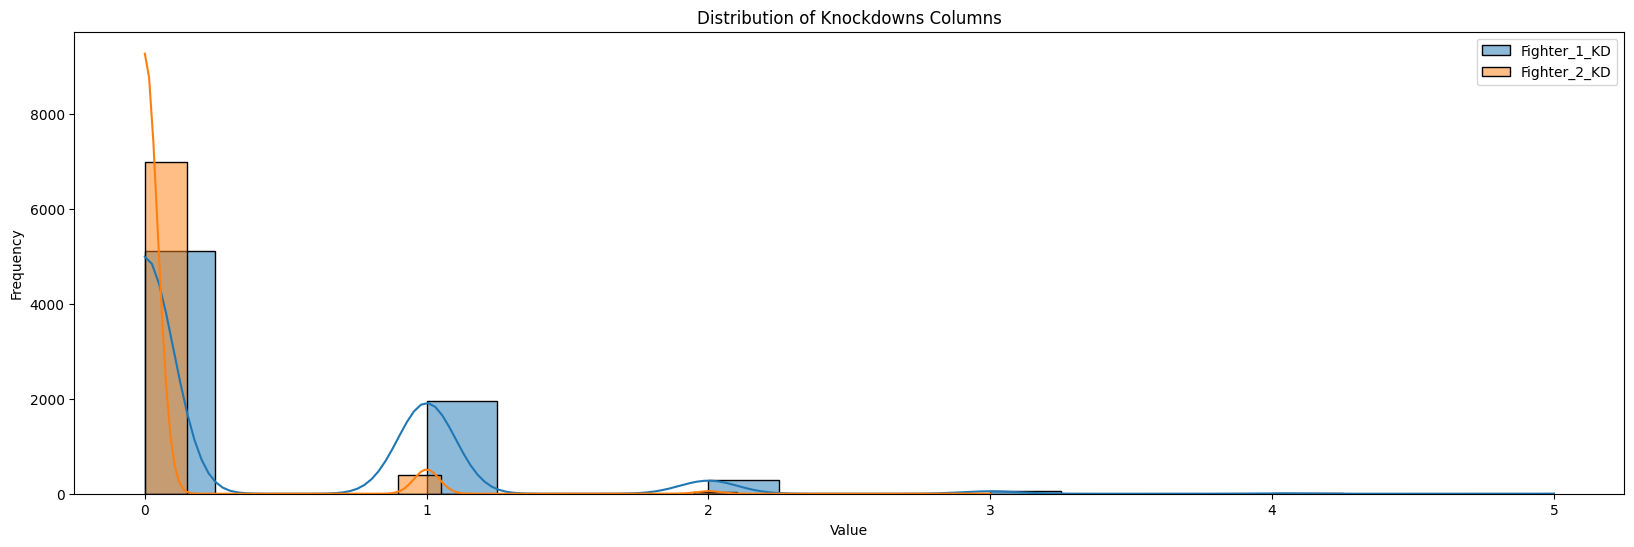

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Now, you can use plt and sns for plotting
plt.figure(figsize=(20, 6))
sns.histplot(ufc_df, x='Fighter_1_KD', kde=True, label='Fighter_1_KD', bins=20)
sns.histplot(ufc_df, x='Fighter_2_KD', kde=True, label='Fighter_2_KD', bins=20)

plt.title('Distribution of Knockdowns Columns')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


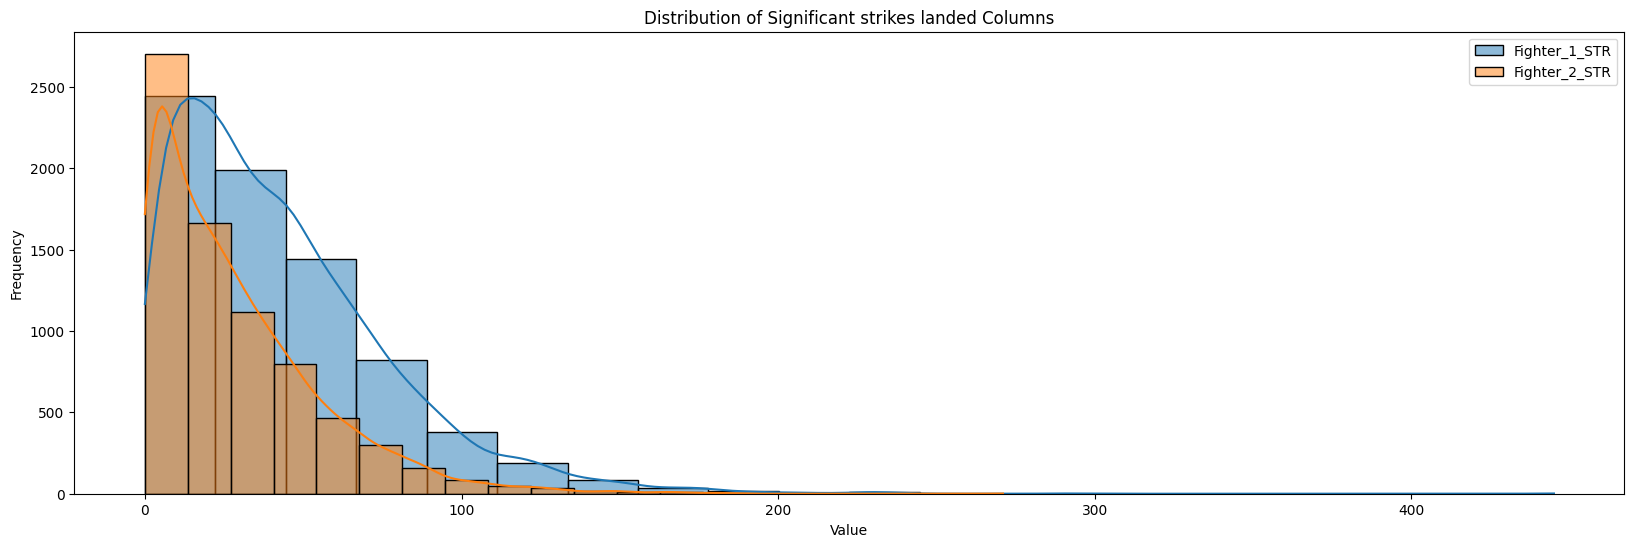

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot(ufc_df, x='Fighter_1_STR', kde=True, label='Fighter_1_STR', bins=20)
sns.histplot(ufc_df, x='Fighter_2_STR', kde=True, label='Fighter_2_STR', bins=20)

plt.title('Distribution of Significant strikes landed Columns')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

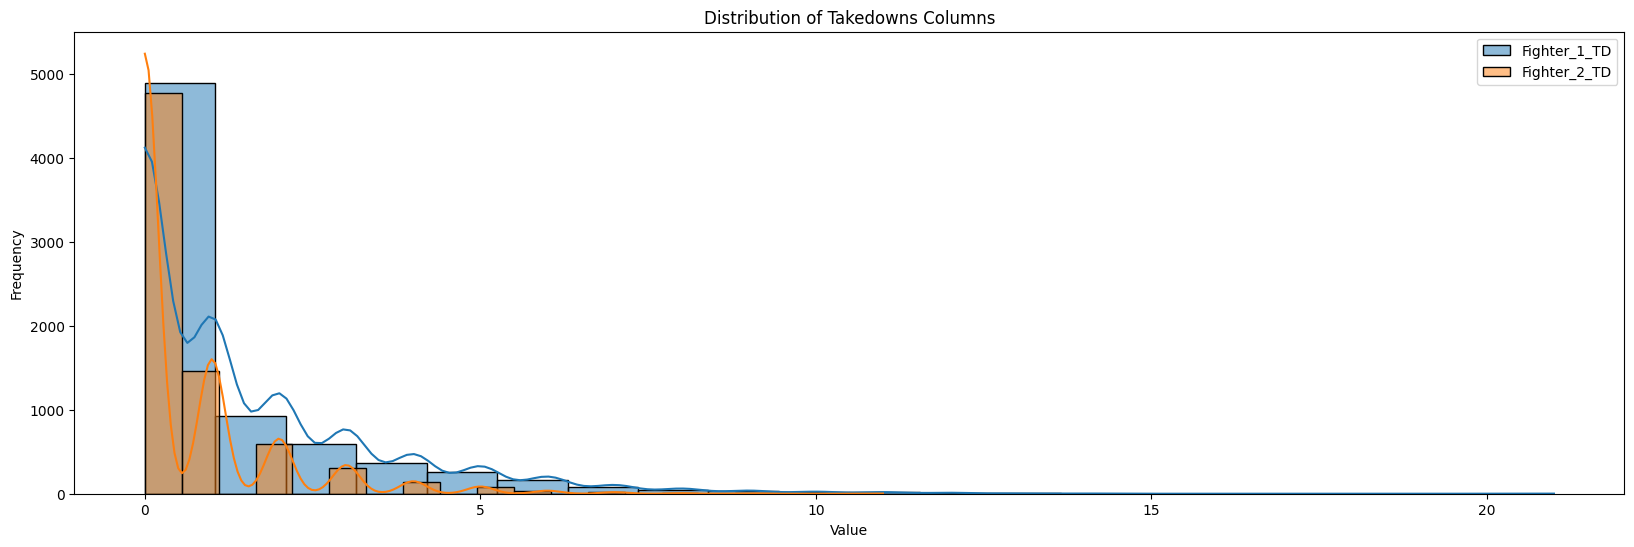

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot(ufc_df, x='Fighter_1_TD', kde=True, label='Fighter_1_TD', bins=20)
sns.histplot(ufc_df, x='Fighter_2_TD', kde=True, label='Fighter_2_TD', bins=20)

plt.title('Distribution of Takedowns Columns')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

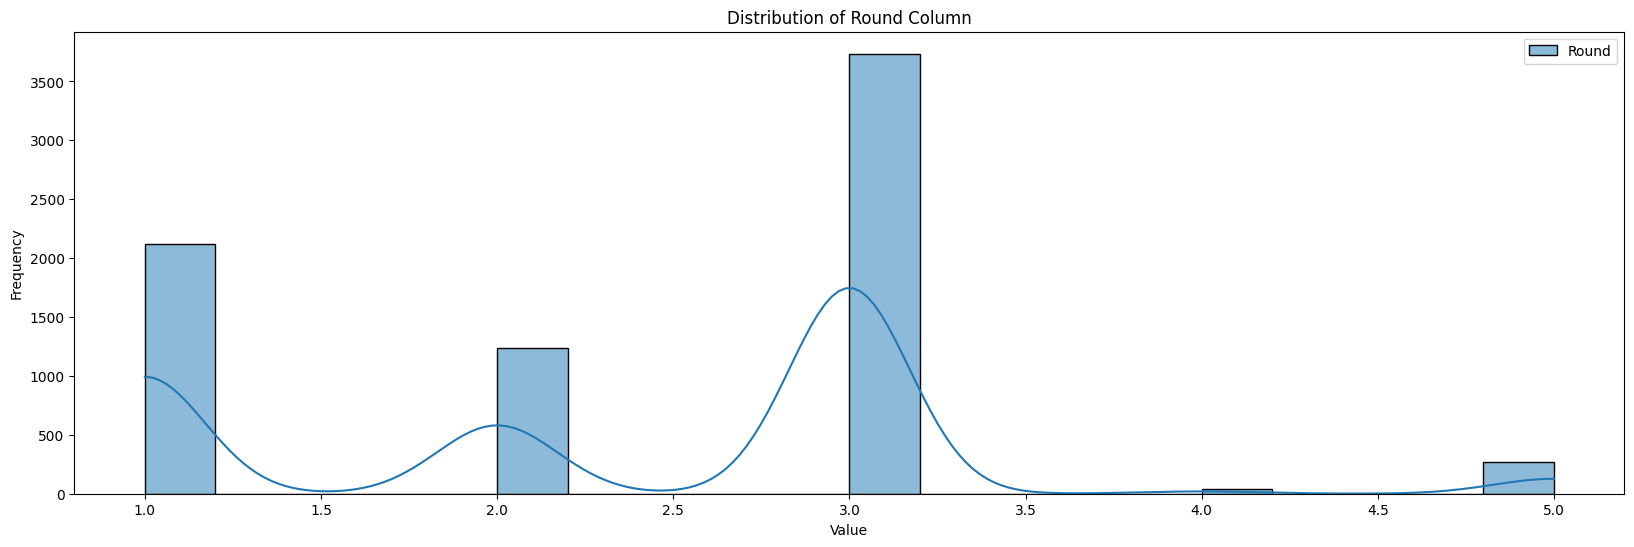

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot(ufc_df, x='Round', kde=True, label='Round', bins=20)

plt.title('Distribution of Round Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

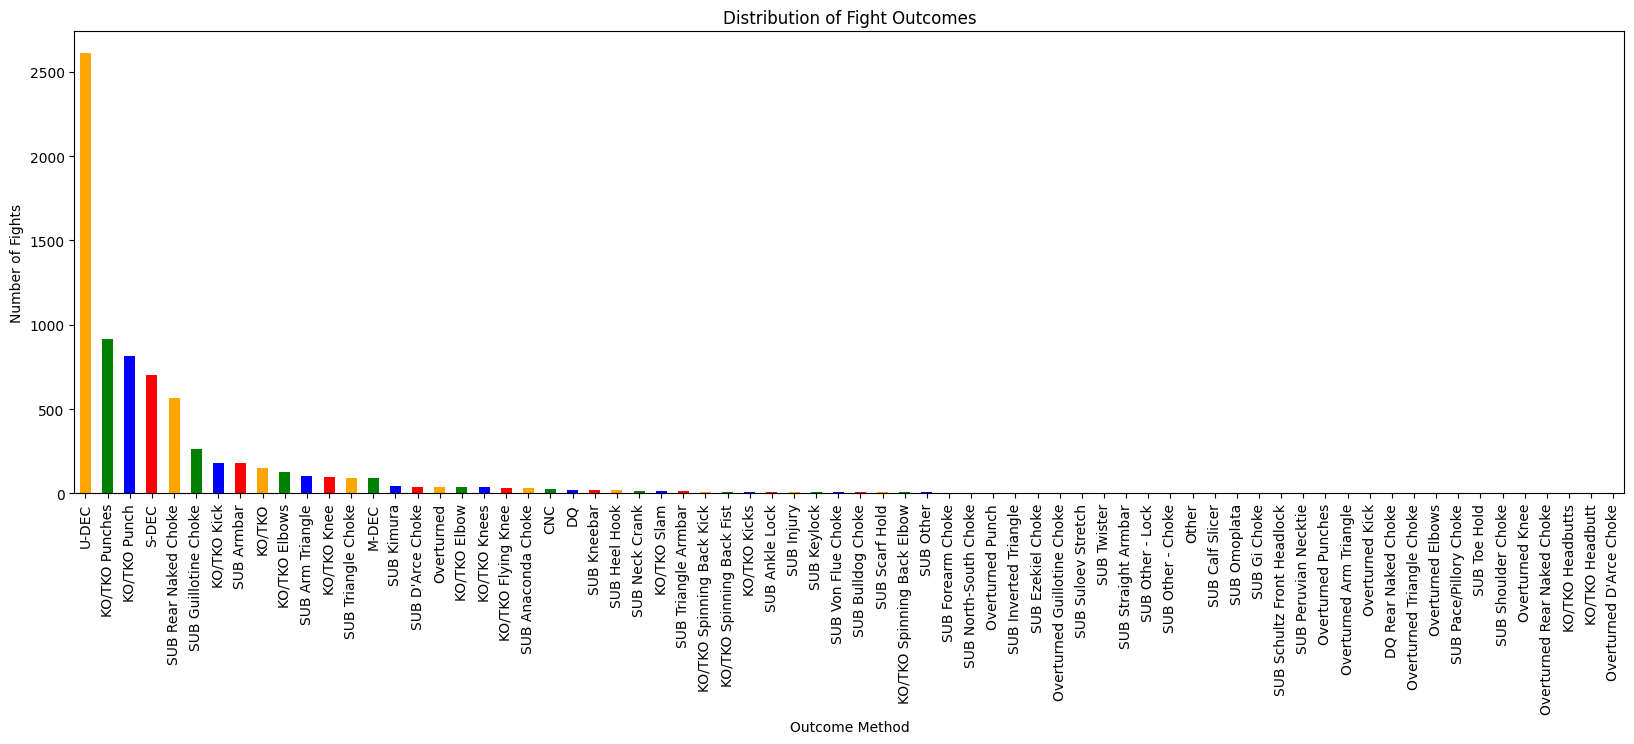

In [ ]:
methods = ufc_df['Method']

plt.figure(figsize=(20, 6))
methods.value_counts().plot(kind='bar', color=['orange', 'green', 'blue', 'red'])
plt.title('Distribution of Fight Outcomes')
plt.xlabel('Outcome Method')
plt.ylabel('Number of Fights')
plt.show()

In [ ]:
#Identify fighters with exceptional performance in specific areas.

<Figure size 2000x600 with 0 Axes>

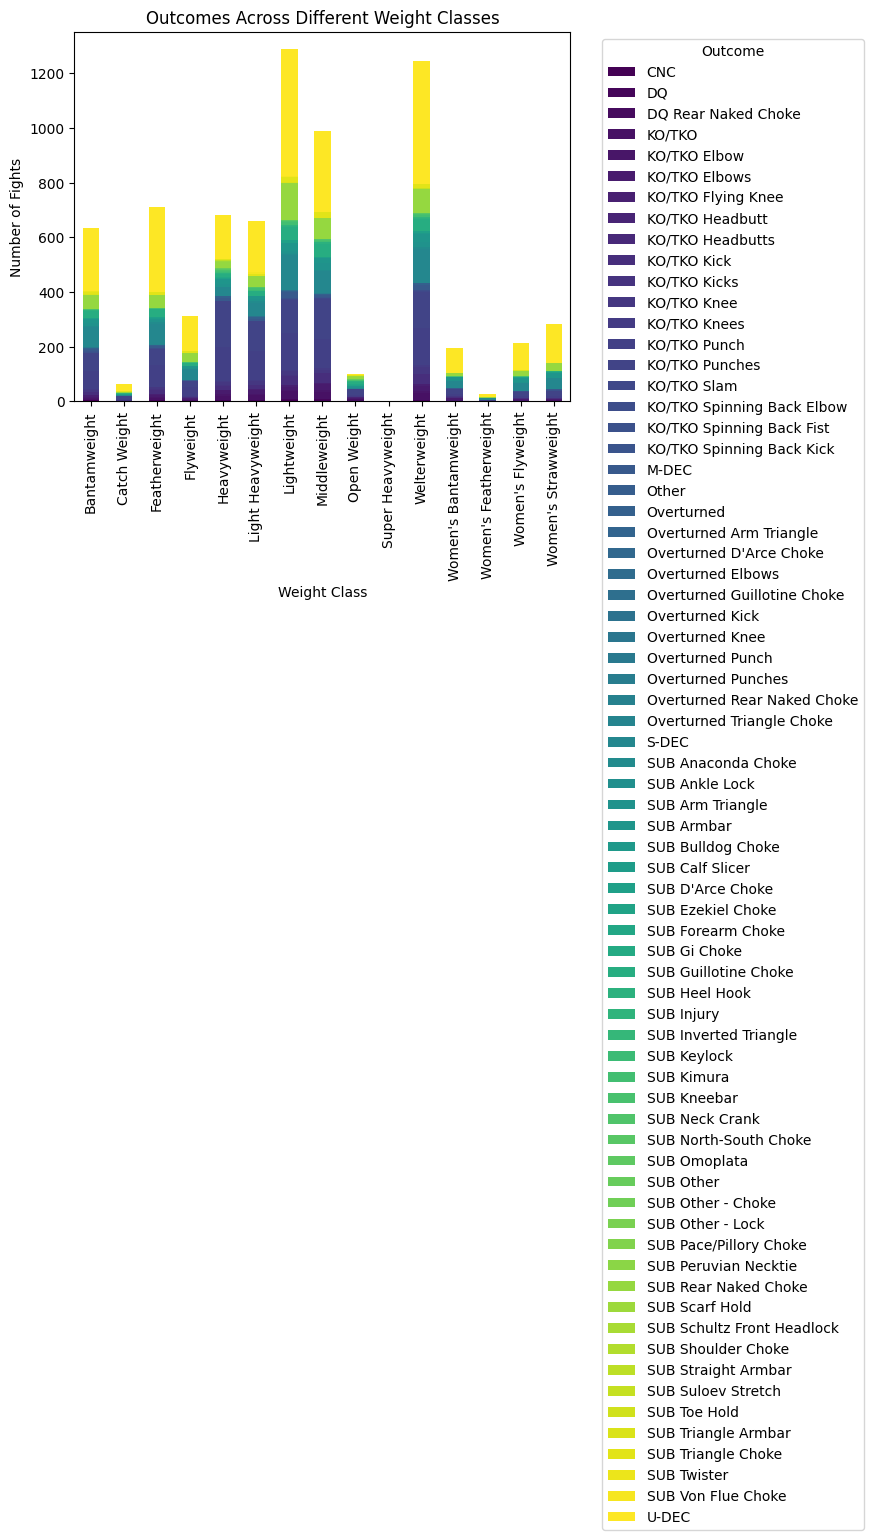

In [ ]:
weight_class_column = 'Weight_Class'
outcome_column = 'Method'

weight_class_outcomes = ufc_df.groupby([weight_class_column, outcome_column]).size().unstack(fill_value=0)

plt.figure(figsize=(20, 6))
weight_class_outcomes.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Outcomes Across Different Weight Classes')
plt.xlabel('Weight Class')
plt.ylabel('Number of Fights')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


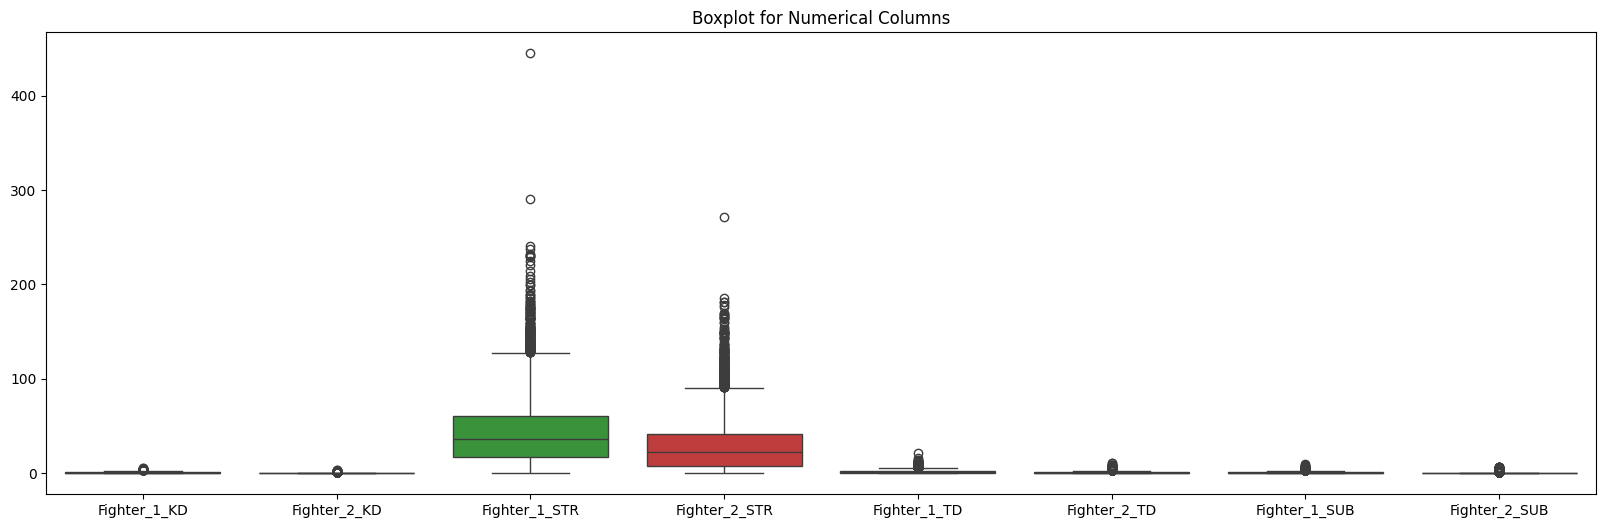

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=ufc_df[numeric_columns])
plt.title('Boxplot for Numerical Columns')
plt.show()

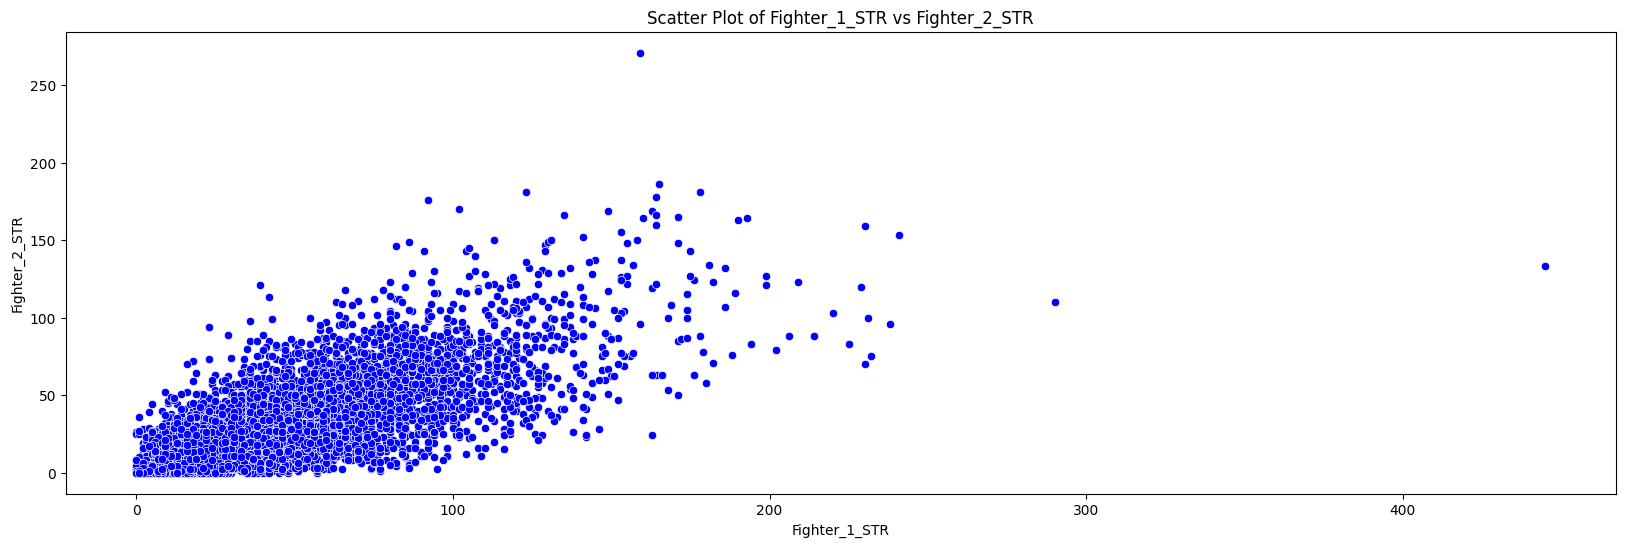

In [ ]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=ufc_df['Fighter_1_STR'], y=ufc_df['Fighter_2_STR'], color='blue')
plt.title('Scatter Plot of Fighter_1_STR vs Fighter_2_STR')
plt.xlabel('Fighter_1_STR')
plt.ylabel('Fighter_2_STR')
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

ufc_df['Fighter_1_STR_winsorized'] = winsorize(ufc_df['Fighter_1_STR'], limits=[0.05, 0.05])
ufc_df['Fighter_2_STR_winsorized'] = winsorize(ufc_df['Fighter_2_STR'], limits=[0.05, 0.05])

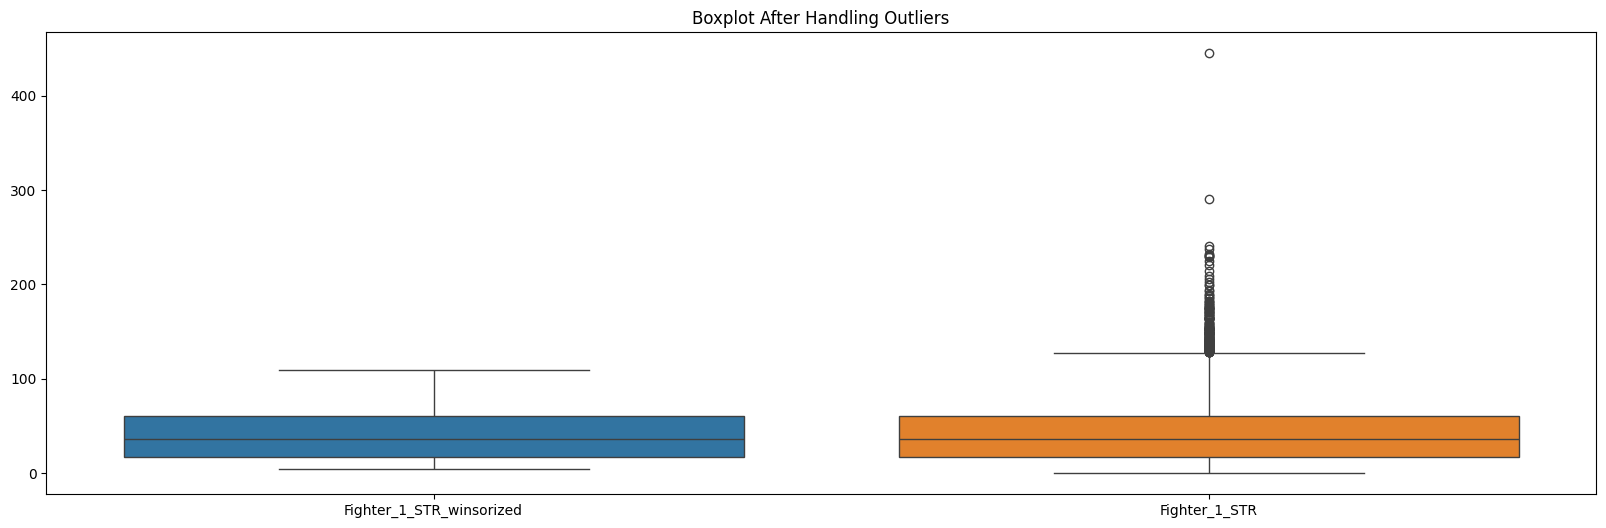

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=ufc_df[['Fighter_1_STR_winsorized', 'Fighter_1_STR']])
plt.title('Boxplot After Handling Outliers')
plt.show()

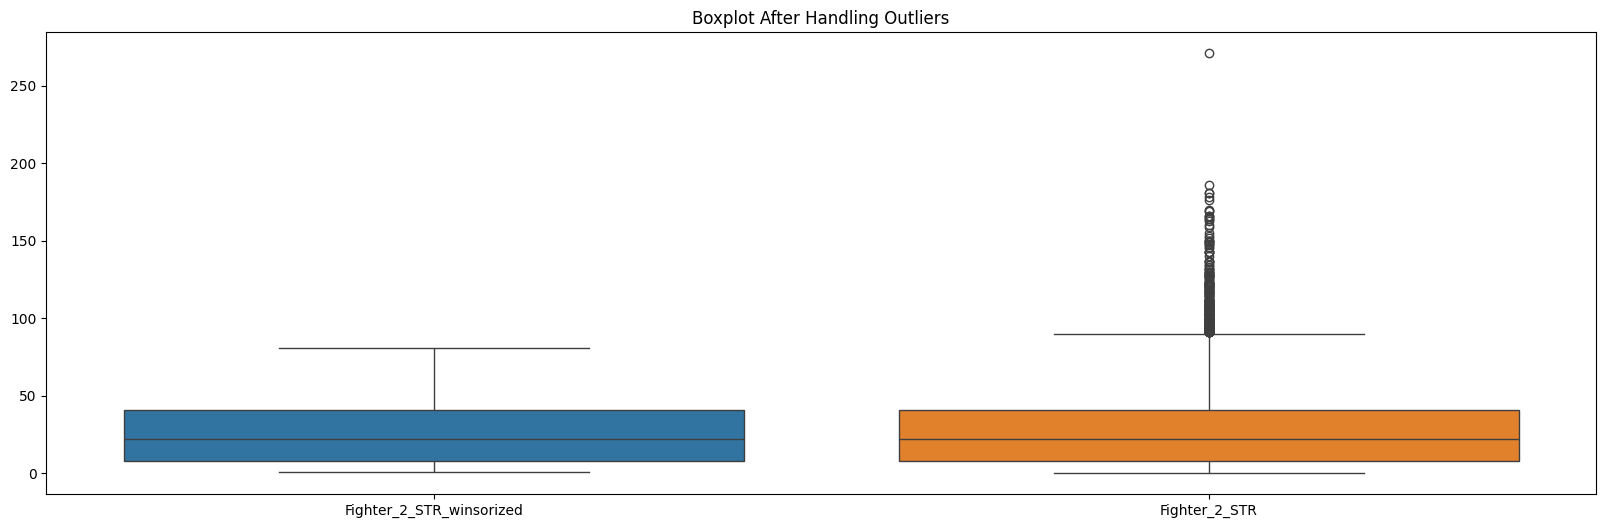

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=ufc_df[['Fighter_2_STR_winsorized', 'Fighter_2_STR']])
plt.title('Boxplot After Handling Outliers')
plt.show()

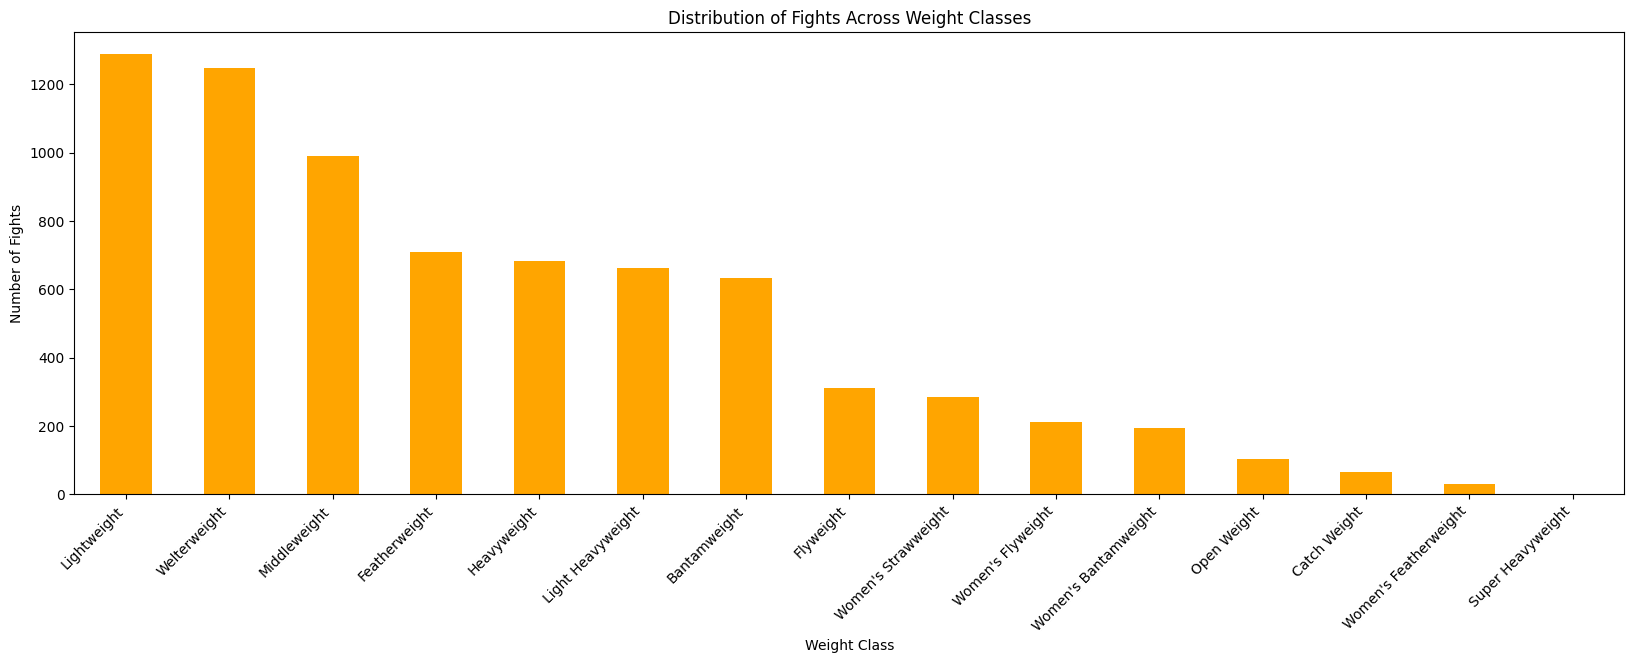

In [ ]:
weight_class_distribution = ufc_df['Weight_Class'].value_counts()
weight_class_distribution.plot(kind='bar', color='orange', figsize=(20, 6))
plt.title('Distribution of Fights Across Weight Classes')
plt.xlabel('Weight Class')
plt.ylabel('Number of Fights')
plt.xticks(rotation=45, ha='right')
plt.show()

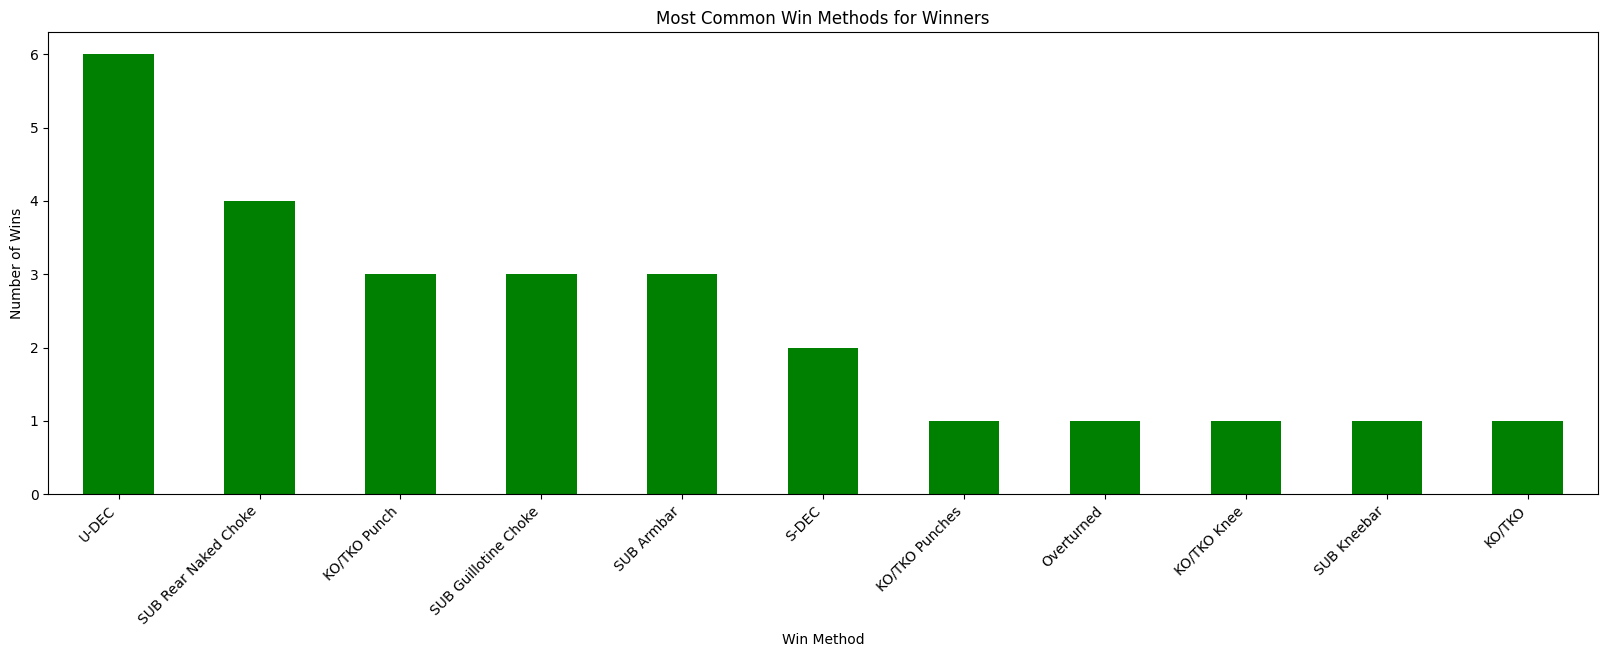

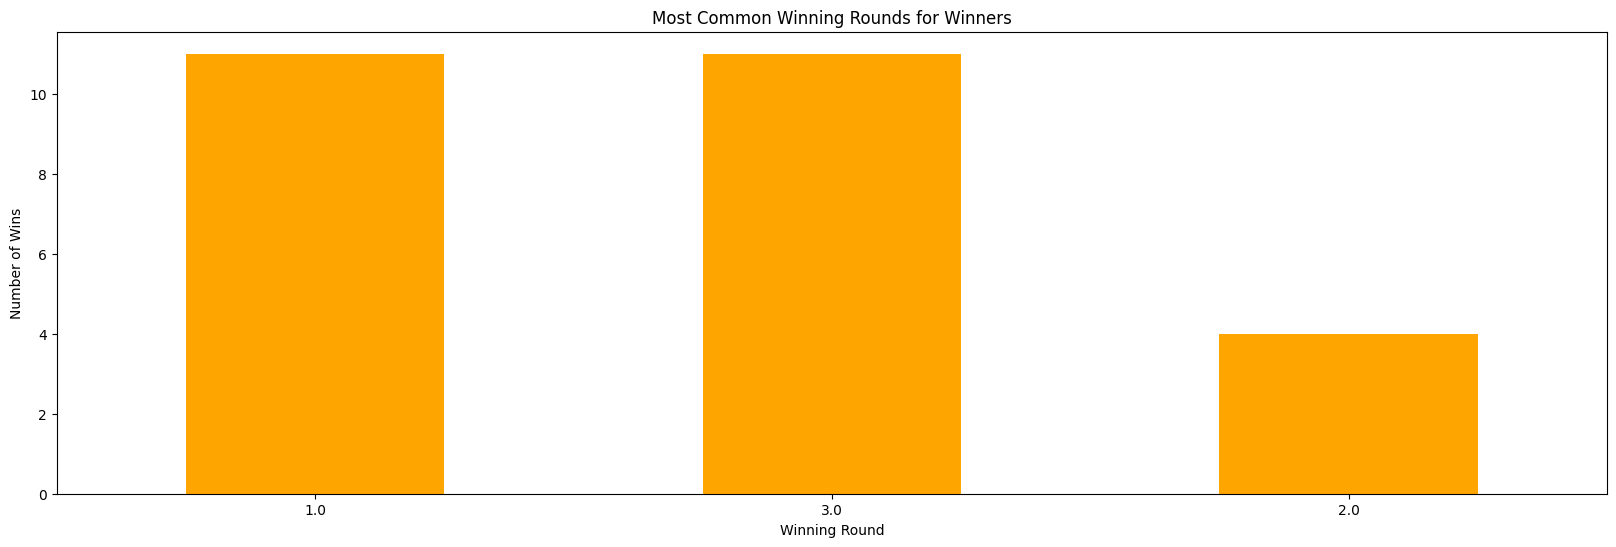

In [ ]:
def analyze_winner_statistics(ufc_df):
    winners = ufc_df['Winner']

    winner_counts = winners.value_counts()

    win_methods = ufc_df.loc[ufc_df['Winner'] == winners.mode()[0]]['Method'].value_counts()
    win_rounds = ufc_df.loc[ufc_df['Winner'] == winners.mode()[0]]['Round'].value_counts()

    win_methods.plot(kind='bar', color='green', figsize=(20, 6))
    plt.title('Most Common Win Methods for Winners')
    plt.xlabel('Win Method')
    plt.ylabel('Number of Wins')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    win_rounds.plot(kind='bar', color='orange', figsize=(20, 6))
    plt.title('Most Common Winning Rounds for Winners')
    plt.xlabel('Winning Round')
    plt.ylabel('Number of Wins')
    plt.xticks(rotation=0)
    plt.show()

analyze_winner_statistics(ufc_df)

In [ ]:
import pandas as pd

# Path to the Excel file
file_path = '/UFC DATA UPDATED.xlsx'

# Read the Excel file
df_fight_night = pd.read_excel(file_path)

# Display the first 5 rows of the DataFrame
df_fight_night.head(5)


,Fighter_A_SS,Fighter_A_KD,Fighter_A_takedown,Fighter_A_control_time,Fighter_A_damage,Fighter_A_violation,Fighter_A_fight_ending,Fighter_B_SS,Fighter_B_KD,Fighter_B_takedown,...,Fighter_B_fight_ending,Score_Fighter_A1,Score_Fighter_A2,Score_Fighter_A3,Score_Fighter_B1,Score_Fighter_B2,Score_Fighter_B3,Round,Fighter A name,Fighter B name
0,28,0,0,0,NaN,NaN,NaN,40,0,0,...,NaN,9,10,10,9,8,8,1,Mana Martinez,Cameron Saaiman
1,18,0,0,0,NaN,NaN,NaN,32,1,0,...,NaN,9,9,9,10,10,10,2,Mana Martinez,Cameron Saaiman
2,14,0,0,0,NaN,NaN,NaN,45,0,1,...,NaN,8,9,8,10,10,10,3,Mana Martinez,Cameron Saaiman
3,9,0,0,11,NaN,NaN,NaN,17,0,1,...,NaN,9,9,9,10,10,10,1,Da'Mon Blackshear,Farid Basharat
4,15,0,1,90,NaN,NaN,NaN,21,0,1,...,NaN,9,9,9,10,10,10,2,Da'Mon Blackshear,Farid Basharat


In [ ]:
#SMOTE

Not enough samples in at least one class to perform SMOTE. Proceeding with original data.
Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Test Accuracy:  0.8082191780821918
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         7
           6       0.82      1.00      0.90        59
           9       0.00      0.00      0.00         1

    accuracy                           0.81        73
   macro avg       0.16      0.20      0.18        73
weighted avg       0.66      0.81      0.73        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


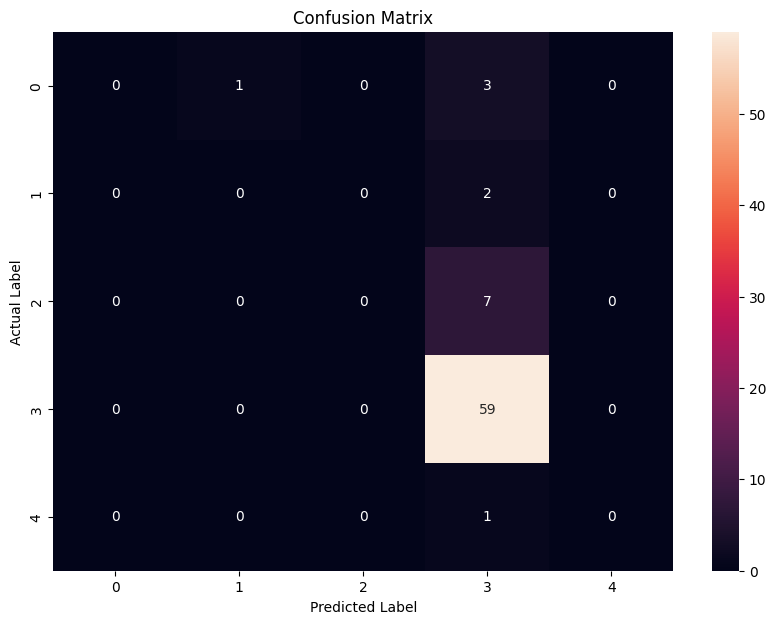

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('/content/UFC DATA UPDATED.xlsx')

# Compute differences in fight stats as features
df['Diff_SS'] = df.iloc[:, 0] - df.iloc[:, 7]
df['Diff_KD'] = df.iloc[:, 1] - df.iloc[:, 8]
df['Diff_TD'] = df.iloc[:, 2] - df.iloc[:, 9]
df['Diff_CTRL'] = df.iloc[:, 3] - df.iloc[:, 10]
features = ['Diff_SS', 'Diff_KD', 'Diff_TD', 'Diff_CTRL']

# Encode scores for all judges
encoder = LabelEncoder()
for col in ['Score_Fighter_A1', 'Score_Fighter_A2', 'Score_Fighter_A3', 'Score_Fighter_B1', 'Score_Fighter_B2', 'Score_Fighter_B3']:
    df[col + '_encoded'] = encoder.fit_transform(df[col].astype(str))

# Combine encoded scores into a single target variable
df['Combined_Scores'] = df['Score_Fighter_A1_encoded'] + df['Score_Fighter_A2_encoded'] + df['Score_Fighter_A3_encoded'] + df['Score_Fighter_B1_encoded'] + df['Score_Fighter_B2_encoded'] + df['Score_Fighter_B3_encoded']

# Prepare features and labels
X = df[features]
y = df['Combined_Scores']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

# Check minimum class size
min_class_size = y_train.value_counts().min()
k_neighbors = min(5, min_class_size - 1)  # Ensure k_neighbors is less than the smallest class size

if k_neighbors > 0:
    smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
else:
    X_train_smote, y_train_smote = X_train, y_train
    print("Not enough samples in at least one class to perform SMOTE. Proceeding with original data.")

# RandomForest with GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)
best_params = grid_search.best_params_

# Train the final model
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train_smote, y_train_smote)

# Save the model and encoder
with open('rf_best_model_retrained.pkl', 'wb') as f:
    pickle.dump(rf_best, f)
with open('encoder_retrained.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# Predict scores on the test set
predictions = rf_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy: ", accuracy)

# More detailed performance evaluation
print("Classification Report:")
print(classification_report(y_test, predictions))

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_excel('/content/UFC DATA UPDATED.xlsx')

# Combine encoded scores into a single target variable
encoder = LabelEncoder()
for col in ['Score_Fighter_A1', 'Score_Fighter_A2', 'Score_Fighter_A3', 'Score_Fighter_B1', 'Score_Fighter_B2', 'Score_Fighter_B3']:
    df[col + '_encoded'] = encoder.fit_transform(df[col].astype(str))
df['Combined_Scores'] = df['Score_Fighter_A1_encoded'] + df['Score_Fighter_A2_encoded'] + df['Score_Fighter_A3_encoded'] + df['Score_Fighter_B1_encoded'] + df['Score_Fighter_B2_encoded'] + df['Score_Fighter_B3_encoded']

# Print the class distribution
class_distribution = df['Combined_Scores'].value_counts()
print("Class Distribution:\n", class_distribution)

# Print total number of rows in the dataset
total_rows = df.shape[0]
print("TOTAL NUMBER OF ROUNDS IN DATASET:", total_rows)



Class Distribution:
 Combined_Scores
6     304
5      23
4      20
3      12
9       3
12      1
Name: count, dtype: int64
TOTAL NUMBER OF ROUNDS IN DATASET: 363
